# 🔮 Unit 1.4: Bayesian Inference & Parameter Estimation

**Course:** Advanced Machine Learning (AICC 303)  
**Topics:**
*   1.2 Maximum Likelihood Estimation (MLE)
*   1.3 Maximum A Posteriori (MAP)
*   1.4 Bayesian Inference (Priors, Posteriors)
*   1.6 Parameter Estimation

**The Philosophy:**
*   **Frequentist (MLE):** Parameters are fixed constants. Data is random.
*   **Bayesian:** Parameters are random variables with their own distributions. We update our belief (Prior \u2192 Posterior) after seeing data.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Setup
sns.set(style="whitegrid")
np.random.seed(42)

## 1. Maximum Likelihood Estimation (MLE)

Goal: Find the parameter $\theta$ that makes the observed data $D$ most probable.
$$ \hat{\theta}_{MLE} = \text{argmax}_\theta P(D | \theta) $$

**Example: Coin Toss (Bernoulli)**
Heads=7, Tails=3. What is $P(Head)=\theta$?
Intuitively: 0.7.

Data: [1 0 0 1 1 1 1 0 0 0], Heads: 5


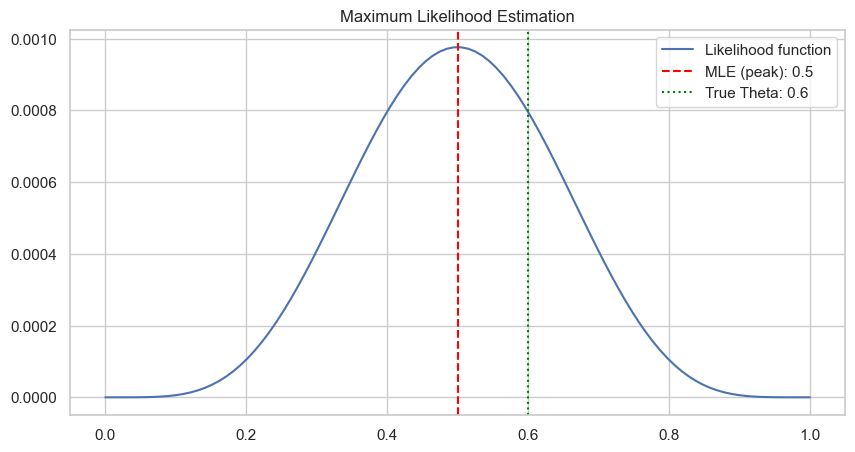

In [2]:
# Generate Data (True theta = 0.6)
true_theta = 0.6
n_trials = 10
data = np.random.binomial(1, true_theta, n_trials)
heads = np.sum(data)
print(f"Data: {data}, Heads: {heads}")

# Likelihood Function L(theta) = theta^H * (1-theta)^T
thetas = np.linspace(0, 1, 100)
likelihood = thetas**heads * (1-thetas)**(n_trials - heads)

mle_estimate = heads / n_trials

plt.figure(figsize=(10, 5))
plt.plot(thetas, likelihood, label='Likelihood function')
plt.axvline(mle_estimate, color='red', linestyle='--', label=f'MLE (peak): {mle_estimate}')
plt.axvline(true_theta, color='green', linestyle=':', label=f'True Theta: {true_theta}')
plt.title("Maximum Likelihood Estimation")
plt.legend()
plt.show()

## 2. Bayesian Inference (The Posterior)

We start with a **Prior** belief $P(\theta)$.
We see data $D$.
We update to get **Posterior** $P(\theta | D)$.

$$ P(\theta | D) = \frac{P(D | \theta) P(\theta)}{P(D)} $$

**Conjugate Priors:**
If we use a **Beta** prior for a Bernoulli likelihood, the Posterior is *also* a Beta distribution.
Prior: Beta($\alpha, \beta$)
Posterior: Beta($\alpha + Heads, \beta + Tails$)

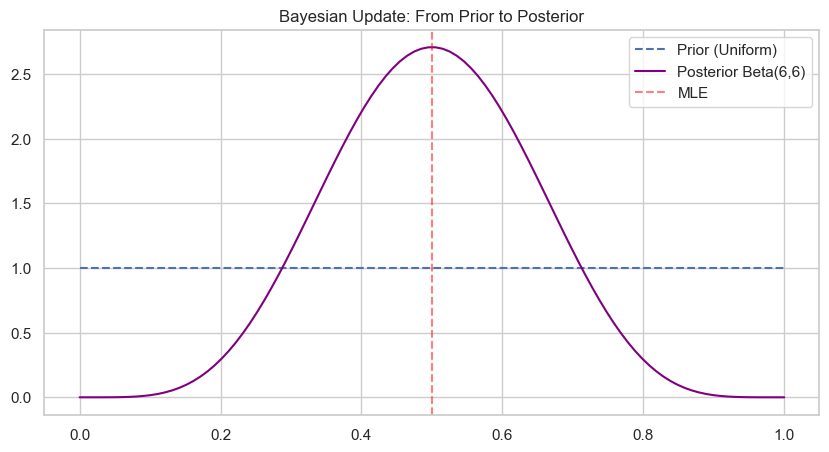

In [3]:
# 1. Uninformative Prior (Uniform)
alpha_prior, beta_prior = 1, 1 # Beta(1,1) is Uniform

# 2. Update with Data
alpha_post = alpha_prior + heads
beta_post = beta_prior + (n_trials - heads)

prior_dist = stats.beta(alpha_prior, beta_prior).pdf(thetas)
posterior_dist = stats.beta(alpha_post, beta_post).pdf(thetas)

plt.figure(figsize=(10, 5))
plt.plot(thetas, prior_dist, label='Prior (Uniform)', linestyle='--')
plt.plot(thetas, posterior_dist, label=f'Posterior Beta({alpha_post},{beta_post})', color='purple')
plt.axvline(mle_estimate, color='red', linestyle='--', alpha=0.5, label='MLE')
plt.title("Bayesian Update: From Prior to Posterior")
plt.legend()
plt.show()

## 3. Maximum A Posteriori (MAP)

MAP = The mode (peak) of the Posterior distribution.
It incorporates the Prior. 

If Prior is Uniform, MAP = MLE.
If Prior is strong (regularization), MAP pulls estimate towards prior.

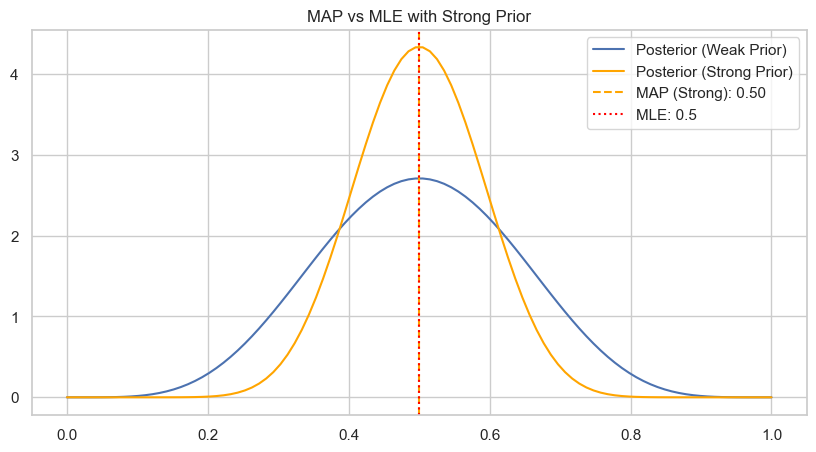

In [4]:
# Example with Strong Prior (Belief that coin is fair)
alpha_strong, beta_strong = 10, 10

alpha_post_s = alpha_strong + heads
beta_post_s = beta_strong + (n_trials - heads)

posterior_strong = stats.beta(alpha_post_s, beta_post_s).pdf(thetas)
map_estimate = (alpha_post_s - 1) / (alpha_post_s + beta_post_s - 2)

plt.figure(figsize=(10, 5))
plt.plot(thetas, posterior_dist, label='Posterior (Weak Prior)')
plt.plot(thetas, posterior_strong, label='Posterior (Strong Prior)', color='orange')
plt.axvline(map_estimate, color='orange', linestyle='--', label=f'MAP (Strong): {map_estimate:.2f}')
plt.axvline(mle_estimate, color='red', linestyle=':', label=f'MLE: {mle_estimate}')
plt.title("MAP vs MLE with Strong Prior")
plt.legend()
plt.show()